## Wordcloud of Top 75 Words in Star Trek: The Next Generation

### Global parameters 

You will need to have set up a [Karst account](https://kb.iu.edu/d/bezu#account) first. Once you have your Karst account simply go to [rstudio.iu.edu](https://rstudio.iu.edu/auth-sign-in) and login using your IU username and passphrase.  Next, set the working directory by pointing to the location on Karst where you have stored the files. Below, we have chosen to save the folder "Text-Analysis" as a "Project" in R Studio on the Karst super-computer here at Indiana University. It contains the R scripts, texts, notebooks, and results. If you have forked and cloned the Github repository (see [textPrep.Rmd](textPrep.Rmd) for directions on how), simply point to where you have saved the folder. If you save it to your personal Karst folder, it will most likely look very similar to the example below. Karst is a unix server and so the home directory is represented by a ~ and, thus, the path will look like this "~/Text-Analysis/" (with the quotes). Alternatively, if you are on a PC, you will need to use an absolute path such as "C:/Users/XXX" (with the quotes again).

In R Studio, click Session in the menu bar > Set Working Directory > Choose Directory, then select the Text-Analysis directory in which you are working. This will set your working directory in the console pane, but make sure to copy the path into the source pane above to keep the directory constant if you close this script and reopen later. Make sure you click on the blue cube with a "R" in the center to set your working directory to your Text-Analysis project path.

HINT: Your working directory is the folder from which you will be pulling your texts.

In [1]:
setwd("~/Text-Analysis")

#### Include necessary packages for notebook 

R's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of R, others created by R users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In R Studio, packages can be installed by navigating to Tools in the menu bar > Install Packages. Or in the bottom right panel click on the "packages" tab and then click on "install."

- **wordcloud:** Plots wordclouds.
- **tm:** this package provides tools (functions) for performing various types of text mining. In this script, we will use tm to performing text cleaning in order to have uniform data for analysis. Check out [this link](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) for the documentation!</li>

In [3]:
library(wordcloud)
library(tm)

### Read in an entire directory

The "Corpus" function from tm reads in the directory and saves it as a Corpus object. Here we are reading in every episode of Star Trek: The Next Generation.

In [4]:
corpus <- Corpus(DirSource("data/StarTrekNextGenClean/series"))

### Scan in a single text

If you wish to only look at a single file or text, this code uses R's "scan" function to read in the text and is then saved as a variable called "text_raw"

In [5]:
#text_raw<-scan("data/StarTrekNextGenClean/series/277.txt", what="character", sep="\n")

### Save the text as a Corpus object

The "Corpus" function from tm reads in the single vector we scanned in the previous step and saves it as a Corpus object just as it does when reading in an entire directory.

In [6]:
#Create a corpus 
#corpus <- Corpus(VectorSource(text_raw))

### Clean the corpus

To clean the corpus in this example, we are using the tm package's built in tools to:
1. Lowercase all words so that "Lake" and "lake" are recognized as the same string.
2. Build a stopword list that uses a standard English list concatenated with an Early Modern list that has words like "hath" and "thy" in it. We use an Early Modern stopword list as Shakespeare quotes and plays are frequently used in Star Trek: The Next Generation.
3. Remove stopwords using both tm's built in english stopwords and the early modern stopwords created by Cyber DH.
4. Remove punctuation as it is not germane to this analysis.
5. Strip out any whitespace between words to get rid of empty elements.



In [9]:
corpus <- tm_map(corpus, content_transformer(tolower))
#myStopWords <- scan("data/earlyModernStopword.txt", what="character", sep="\n")
corpus <- tm_map(corpus, removeWords, c(stopwords("english"), "just"))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, stripWhitespace)

Plot the wordcloud! There are a number of arguments you can customize: "random.order" is false so that words are plotted in order of decreasing frequency; "scale"" indicates the size of the words; "rot.per" lets you customize the proportion of words that are rotated 90 degrees; "max.words" controls how many words show up in the wordcloud; and we've used the library "RColorBrewer" to give us access to some predefined palettes. Note that if you change the palette, you need to tell the argument how many colors are in the new palette. 

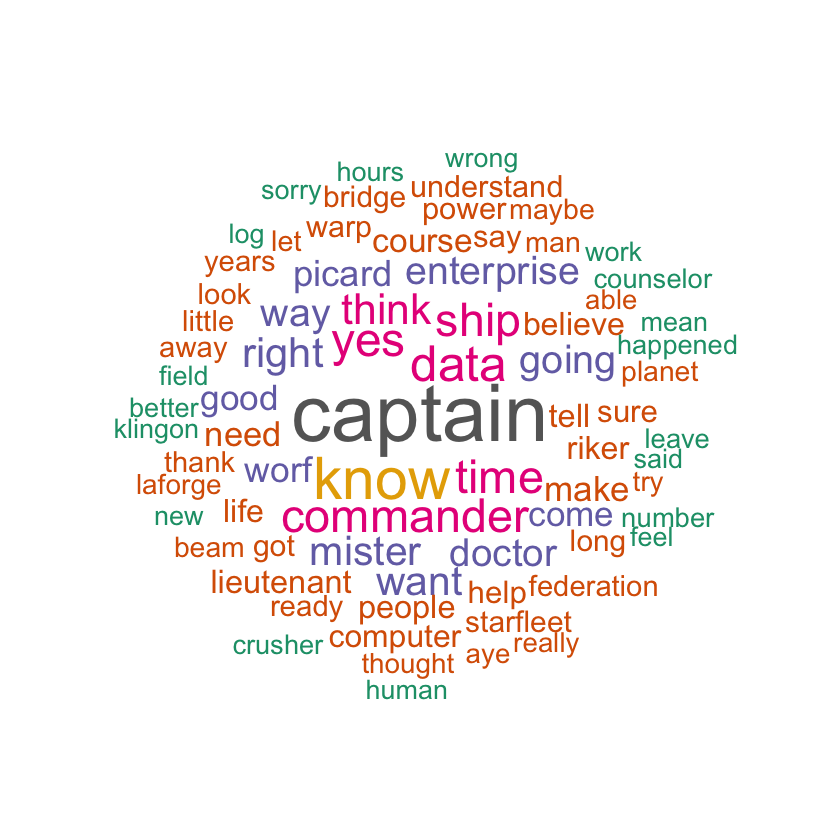

In [10]:
wordcloud(corpus,random.order=FALSE,scale=c(4,1),rot.per=0,
          max.words=75,colors=brewer.pal(8, "Dark2"))

### Voila!